In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import glob
import pickle
import pylab as plt
import matplotlib
from matplotlib.pyplot import get_cmap
%matplotlib inline  
from scipy.spatial.distance import cdist

src_dir = os.path.abspath(os.path.join(os.pardir,'src'))
sys.path[0] = src_dir



In [11]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 480  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = 4*0.66 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
Ampl = 1.0 # Amplification factor for screen: set this to ONE for final plot of eps
fig_size = [Ampl*fig_width,Ampl*fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.labelsize': Ampl*10,
          'text.fontsize': Ampl*8,
          'legend.fontsize': Ampl*6,
          'xtick.labelsize': Ampl*8,
          'ytick.labelsize': Ampl*8,
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          #'figtext.fontsize': Ampl*10,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          'xtick.direction':'out',
          'ytick.direction':'out'
         }
plt.rcParams.update(params)

/home/martin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [12]:
x_bottom = 0.1
x_left = 0.15
x_right = 0.95
x_top = 0.95
x_h=0.15
x_w=0.2

# Load data & Plot the data

In [14]:
cmap = get_cmap('tab10')
list_colors = ['#e66101','#5e3c99']




/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:126: RuntimeWarning: divide by zero encountered in log
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in multiply
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in true_divide
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in true_divide


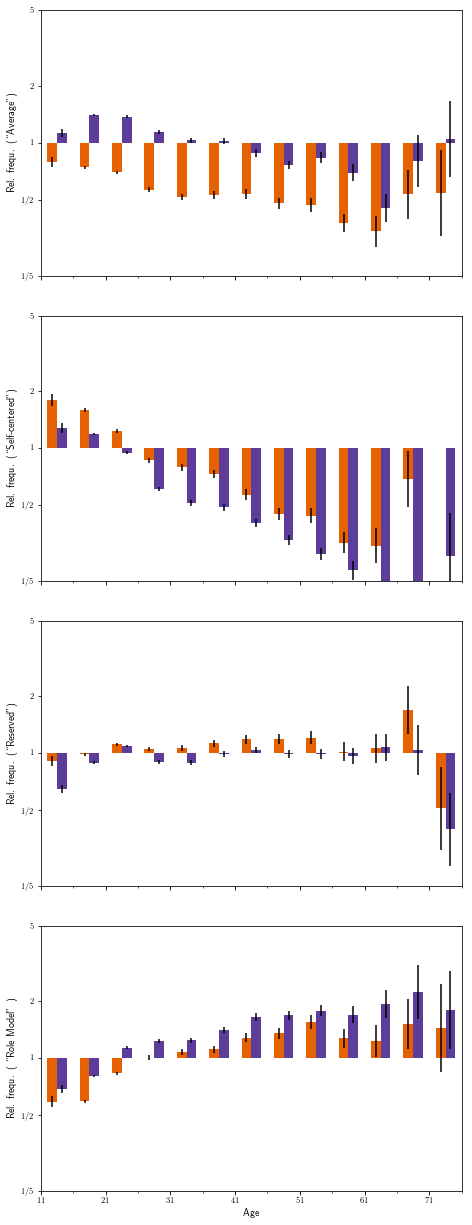

In [17]:
fig = plt.figure(figsize=fig_size)
plt.clf()
#########################################################
## data on gender and age
path_read = '../data_filter/'
fname_read = 'df_demo_ipip300-no0.csv'
filename = os.path.join(path_read,fname_read)
df = pd.read_csv(filename,index_col=0).dropna()

arr_g = np.array(df['gender'].values).astype('float')
arr_a = df['age'].values
N = len(arr_a)

list_g = np.array([0,1])
list_a = np.arange(10,105,5)
delta_a = list_a[1]-list_a[0]

## get the global stats
## distribution of age and gender
list_arr_p_ga = []
list_arr_n_ga = []

for g in list_g:
    inds_g_sel = np.where(arr_g==g)[0]
    arr_a_sel = arr_a[inds_g_sel]
    list_n_ga = []
    for i_a in range(len(list_a)-1):
        a1 = list_a[i_a]
        a2 = list_a[i_a+1]
        n_ga = np.sum( (arr_a_sel>=a1)*(arr_a_sel<a2)   )
        list_n_ga+=[n_ga]
    list_arr_p_ga += [np.array(list_n_ga)/N]
    list_arr_n_ga += [list_n_ga]

#########################################################
### Load position of people in trait space
path_read = '../data_filter/'
fname_read = 'ipip300-no0_arr_pd_neoac_score-1.npy'
filename = os.path.join(path_read,fname_read)

arr_pd = np.load(filename)
N_,D_ = np.shape(arr_pd)
## z-score data
for d in range(D_):
    x_tmp = arr_pd[:,d]
    x_mu = np.mean(x_tmp)
    x_std = np.std(x_tmp)
    arr_pd[:,d] = (x_tmp - x_mu)/x_std

    
    
    
#####################################################
## cluster-positions as described in paper

c_names = ['``Average"','``Self-centered"','``Reserved"',' ``Role Model" ']
arr_cd_dom = np.zeros((4,5))
arr_cd_dom[0,:] = np.array([ 0.55,0.51,-0.60,0.25,0.25 ])
arr_cd_dom[1,:] = np.array([ -0.23,0.70,-0.75,-0.56,-0.44 ])
arr_cd_dom[2,:] = np.array([ -0.54,-0.07,-0.77,0.12,0.19 ])
arr_cd_dom[3,:] = np.array([ -0.70,0.52,0.23,0.62,0.78 ])


## distance of each person to each cluster
S = cdist(arr_pd,arr_cd_dom)


###################################################
## plot
D_crit = np.sqrt(5)
D_crit = 1.5




for i_n in range(4):

    list_arr_n_ga_sel = []
    list_arr_n_ga_sel_null_mu = []
    list_arr_n_ga_sel_null_sigma = []

    ## number of people around the cluster center with distance <= D_crit
    arr_D_pc = S[:,i_n]
    ind_sel = np.where( arr_D_pc <= D_crit )[0]
    N_sel = len(ind_sel)
    for i_g,g in enumerate(list_g):
        inds_g_sel = np.where( (arr_g==g)&(arr_D_pc <= D_crit) )[0]
        arr_a_sel = arr_a[inds_g_sel]
        list_n_ga = []
        for i_a in range(len(list_a)-1):
            a1 = list_a[i_a]
            a2 = list_a[i_a+1]
            n_ga = np.sum( (arr_a_sel>=a1)*(arr_a_sel<a2)   )
            list_n_ga+=[n_ga]


        ## observed number of people in cluster with g and a
        arr_n_ga = np.array(list_n_ga)
        list_arr_n_ga_sel += [arr_n_ga]
        ## expected number of people in cluster with g and a
        ## drawing N_sel people with global probability of g and a
        arr_p_ga_null = list_arr_p_ga[i_g]
        arr_n_ga_null_mu = N_sel*arr_p_ga_null

        arr_n_ga_null_sigma = np.sqrt(N_sel*arr_p_ga_null*(1.0-arr_p_ga_null) )
        list_arr_n_ga_sel_null_mu += [arr_n_ga_null_mu]
        list_arr_n_ga_sel_null_sigma += [arr_n_ga_null_sigma]      

    ax = fig.add_subplot(4,1,  i_n+1 )


    list_labels = ['Male','Female']
    baseline=0
    for i_g,arr_ga in enumerate(list_arr_n_ga_sel):
        arr_ga_null_mu = list_arr_n_ga_sel_null_mu[i_g]
        arr_ga_null_sigma = list_arr_n_ga_sel_null_sigma[i_g]


        x = list_a[:-1]
        y = arr_ga/arr_ga_null_mu
        yerr = arr_ga/(arr_ga_null_mu**2)*arr_ga_null_sigma

        dx = 1.5
        xshift = delta_a/2+(i_g-0.5)*dx
        X = x+xshift
        Y = np.log(y-baseline)
        Z = 1.0/y*yerr
        ax.bar(X,Y,yerr=Z,label=list_labels[i_g],\
               color = list_colors[i_g],width=1.5,bottom=baseline)

    ## xticks labels
    ax.set_xticks(list_a,minor=True)
    ax.set_xticks(list_a[::2])
    if i_n ==3:
        ax.set_xlabel(r'Age')
        ax.set_xticklabels([r'$%s$'%(h) for h in [11,21,31,41,51,61,71]])
    else:
        ax.set_xticklabels([])
#             ax.set_xticklabels(['' for h in list_a])
    ax.set_xlim(10,75)  

    ## yticklabels
    list_y_ = [1/5.0,1.0/2,1,2.0,5.0]
    list_y_str = [r'$1/5$',r'$1/2$',r'$1$',r'$2$',r'$5$']
    list_y  = np.log(np.array( list_y_))

    ax.set_ylim(min(list_y),max(list_y))
    ax.set_yticks(list_y)
    ax.set_yticklabels([str(h) for h in list_y_str])

    ax.set_ylabel('Rel. frequ. (%s)'%(c_names[i_n]))

        


#         ax.set_title(r'Cluster %s'%(i_n+1))
    c_ = cmap(i_n)
plt.subplots_adjust(left=x_left,bottom=x_bottom,right=x_right,top=x_top,hspace=x_h,wspace=x_w)
